# Summary
In this Machine learning project our goal is to showcase the use of different data analyzing tools in order to create areained model
to recognize #TODO Keep writing

# Introduction
## Import Libraries

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from IPython.core.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats


from modules.project_supp import convert_column_to_num_month, month_num_season, month_int_to_str

from tqdm import tqdm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import matplotlib.animation as animation
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve , roc_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from pipelinehelper import PipelineHelper
import category_encoders as ce
import missingno as msno

# import country_converter as coco
# import plotly.graph_objects as go
# import cufflinks

## Import Data

In [2]:
# Loading the main data and the train data

df, y = map(pd.read_csv, (['Data/feature_data.csv', 'Data/label_data.csv']))

# Temporarily load cancellation column to the main data for exploration
df['cancelation'] = y['cancelation']

## First look
Currently, displayed are the first 10 rows of the data

In [3]:
df.head(10)

Unnamed: 0  time_until_order  order_year order_month order_week  \
0       51014             309.0        2016         May    week_20   
1       28536               3.0        2016     October    week_41   
2       21745               NaN        2017       March    week_12   
3       17502             153.0        2015   September    week_40   
4       83295              33.0        2016     January     week_5   
5       67872              50.0        2017         May    week_19   
6       21763               NaN        2016       March    week_11   
7       16156              72.0        2015         NaN    week_33   
8      100645             180.0        2016     October    week_44   
9       95004             280.0        2016      August    week_33   

   order_day_of_month  adults  children  babies country  ... anon_feat_5  \
0                  13       2       0.0       0     PRT  ...         0.0   
1                   2       2       0.0       0     ESP  ...         3.0   
2                  19       1       0.0       0     DEU  ...         4.0   
3                  29       2       0.0       0     GBR  ...         3.0   
4                  25       2       0.0       0     BRA  ...         0.0   
5                   8       2       2.0       0     AGO  ...         5.0   
6                   9       1       0.0       0     PRT  ...         0.0   
7                   9       2       0.0       0     NaN  ...         0.0   
8                  28       2       0.0       0     NaN  ...         0.0   
9                  12       2       2.0       0     GBR  ...         NaN   

  anon_feat_6  anon_feat_7  anon_feat_8  anon_feat_9 anon_feat_10  \
0       215.0          0.0            0          0.0     0.250606   
1         0.0          1.0            1          1.0     0.444719   
2         0.0          0.0            0          1.0     0.598733   
3         0.0          0.0            0          1.0     0.335675   
4        15.0          0.0            0          0.0     0.492874   
5         0.0          0.0            0          0.0     0.297551   
6         0.0          0.0            0          1.0     0.514393   
7         0.0          0.0            2          1.0     0.372214   
8         0.0          0.0            2          0.0     0.427402   
9         0.0          1.0            2          0.0     0.182388   

   anon_feat_11  anon_feat_12 anon_feat_13  cancelation  
0     17.588299          True          1.0         True  
1      2.343371          True          NaN        False  
2      2.498820          True          NaN        False  
3     12.411559          True          NaN        False  
4      5.743378          True          NaN        False  
5      7.234509          True          NaN         True  
6      2.490639          True          NaN        False  
7      8.449535          True          NaN        False  
8     13.497397          True          NaN        False  
9     16.723083         False          0.0        False  

[10 rows x 35 columns]

## Dataframe Info
As seen below this data has 33 features currently of different types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89542 entries, 0 to 89541
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           89542 non-null  int64  
 1   time_until_order     76861 non-null  float64
 2   order_year           89542 non-null  int64  
 3   order_month          86108 non-null  object 
 4   order_week           89542 non-null  object 
 5   order_day_of_month   89542 non-null  int64  
 6   adults               89542 non-null  int64  
 7   children             89538 non-null  float64
 8   babies               89542 non-null  int64  
 9   country              85201 non-null  object 
 10  order_type           89542 non-null  object 
 11  acquisition_channel  89542 non-null  object 
 12  prev_canceled        89542 non-null  int64  
 13  prev_not_canceled    89542 non-null  int64  
 14  changes              86065 non-null  float64
 15  deposit_type         80536 non-null 

In [5]:
df.describe()

Unnamed: 0  time_until_order    order_year  order_day_of_month  \
count   89542.000000      76861.000000  89542.000000        89542.000000   
mean    59716.762871        103.673879   2016.157658           15.828807   
std     34495.242240        106.940156      0.707461            8.779753   
min         0.000000          0.000000   2015.000000            1.000000   
25%     29838.250000         18.000000   2016.000000            8.000000   
50%     59743.500000         69.000000   2016.000000           16.000000   
75%     89610.500000        159.000000   2017.000000           23.000000   
max    119388.000000        737.000000   2017.000000           31.000000   

             adults      children        babies  prev_canceled  \
count  89542.000000  89538.000000  89542.000000   89542.000000   
mean       1.857497      0.103732      0.007896       0.087411   
std        0.565296      0.397797      0.095194       0.849799   
min        0.000000      0.000000      0.000000       0.000000   
25%        2.000000      0.000000      0.000000       0.000000   
50%        2.000000      0.000000      0.000000       0.000000   
75%        2.000000      0.000000      0.000000       0.000000   
max       55.000000     10.000000     10.000000      26.000000   

       prev_not_canceled       changes  ...   anon_feat_3   anon_feat_4  \
count       89542.000000  86065.000000  ...  89542.000000  89542.000000   
mean            0.137701      0.223877  ...      0.032231      0.989971   
std             1.496269      0.663361  ...      0.176613      1.698086   
min             0.000000      0.000000  ...      0.000000      0.000000   
25%             0.000000      0.000000  ...      0.000000      0.000000   
50%             0.000000      0.000000  ...      0.000000      0.000000   
75%             0.000000      0.000000  ...      0.000000      3.000000   
max            72.000000     21.000000  ...      1.000000      9.000000   

        anon_feat_5   anon_feat_6   anon_feat_7   anon_feat_8   anon_feat_9  \
count  85510.000000  85309.000000  85294.000000  89542.000000  85811.000000   
mean       1.330944      2.339401      0.062607      0.571922      0.335691   
std        1.879927     17.516854      0.243415      0.793567      0.472234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      1.000000      1.000000   
max       11.000000    391.000000      3.000000      5.000000      1.000000   

       anon_feat_10  anon_feat_11  anon_feat_13  
count  86810.000000  84585.000000   5776.000000  
mean       0.427146      8.845679      0.365132  
std        0.128140      5.236673      0.481509  
min        0.161008      0.038632      0.000000  
25%        0.328012      4.452191      0.000000  
50%        0.425622      8.422255      0.000000  
75%        0.511077     12.712815      1.000000  
max        0.907525     27.172399      1.000000  

[8 rows x 26 columns]

## Tidying the Data
In This section we won't begin "preprocessing", but
we will commit some minor changes in order to read the data properly.
### Changing Features to Numeric Value
In the beginning we would perform no changes to the data but tidying it

In [4]:
def numbers_to_str(df):
    # Weeks and months
    df["order_month"] = convert_column_to_num_month(df, "order_month")
    df['order_week'] = df['order_week'].str.strip("week_").astype(int)
    # Bol to int
    df['anon_feat_12'] = df['anon_feat_12'].astype(int)
    return df

y['cancelation'] = y['cancelation'].astype(int)
df['cancelation'] = df['cancelation'].astype(int)
df = numbers_to_str(df)

# Part 1: Exploration, Basic Hypothesis

## Histograms for all features

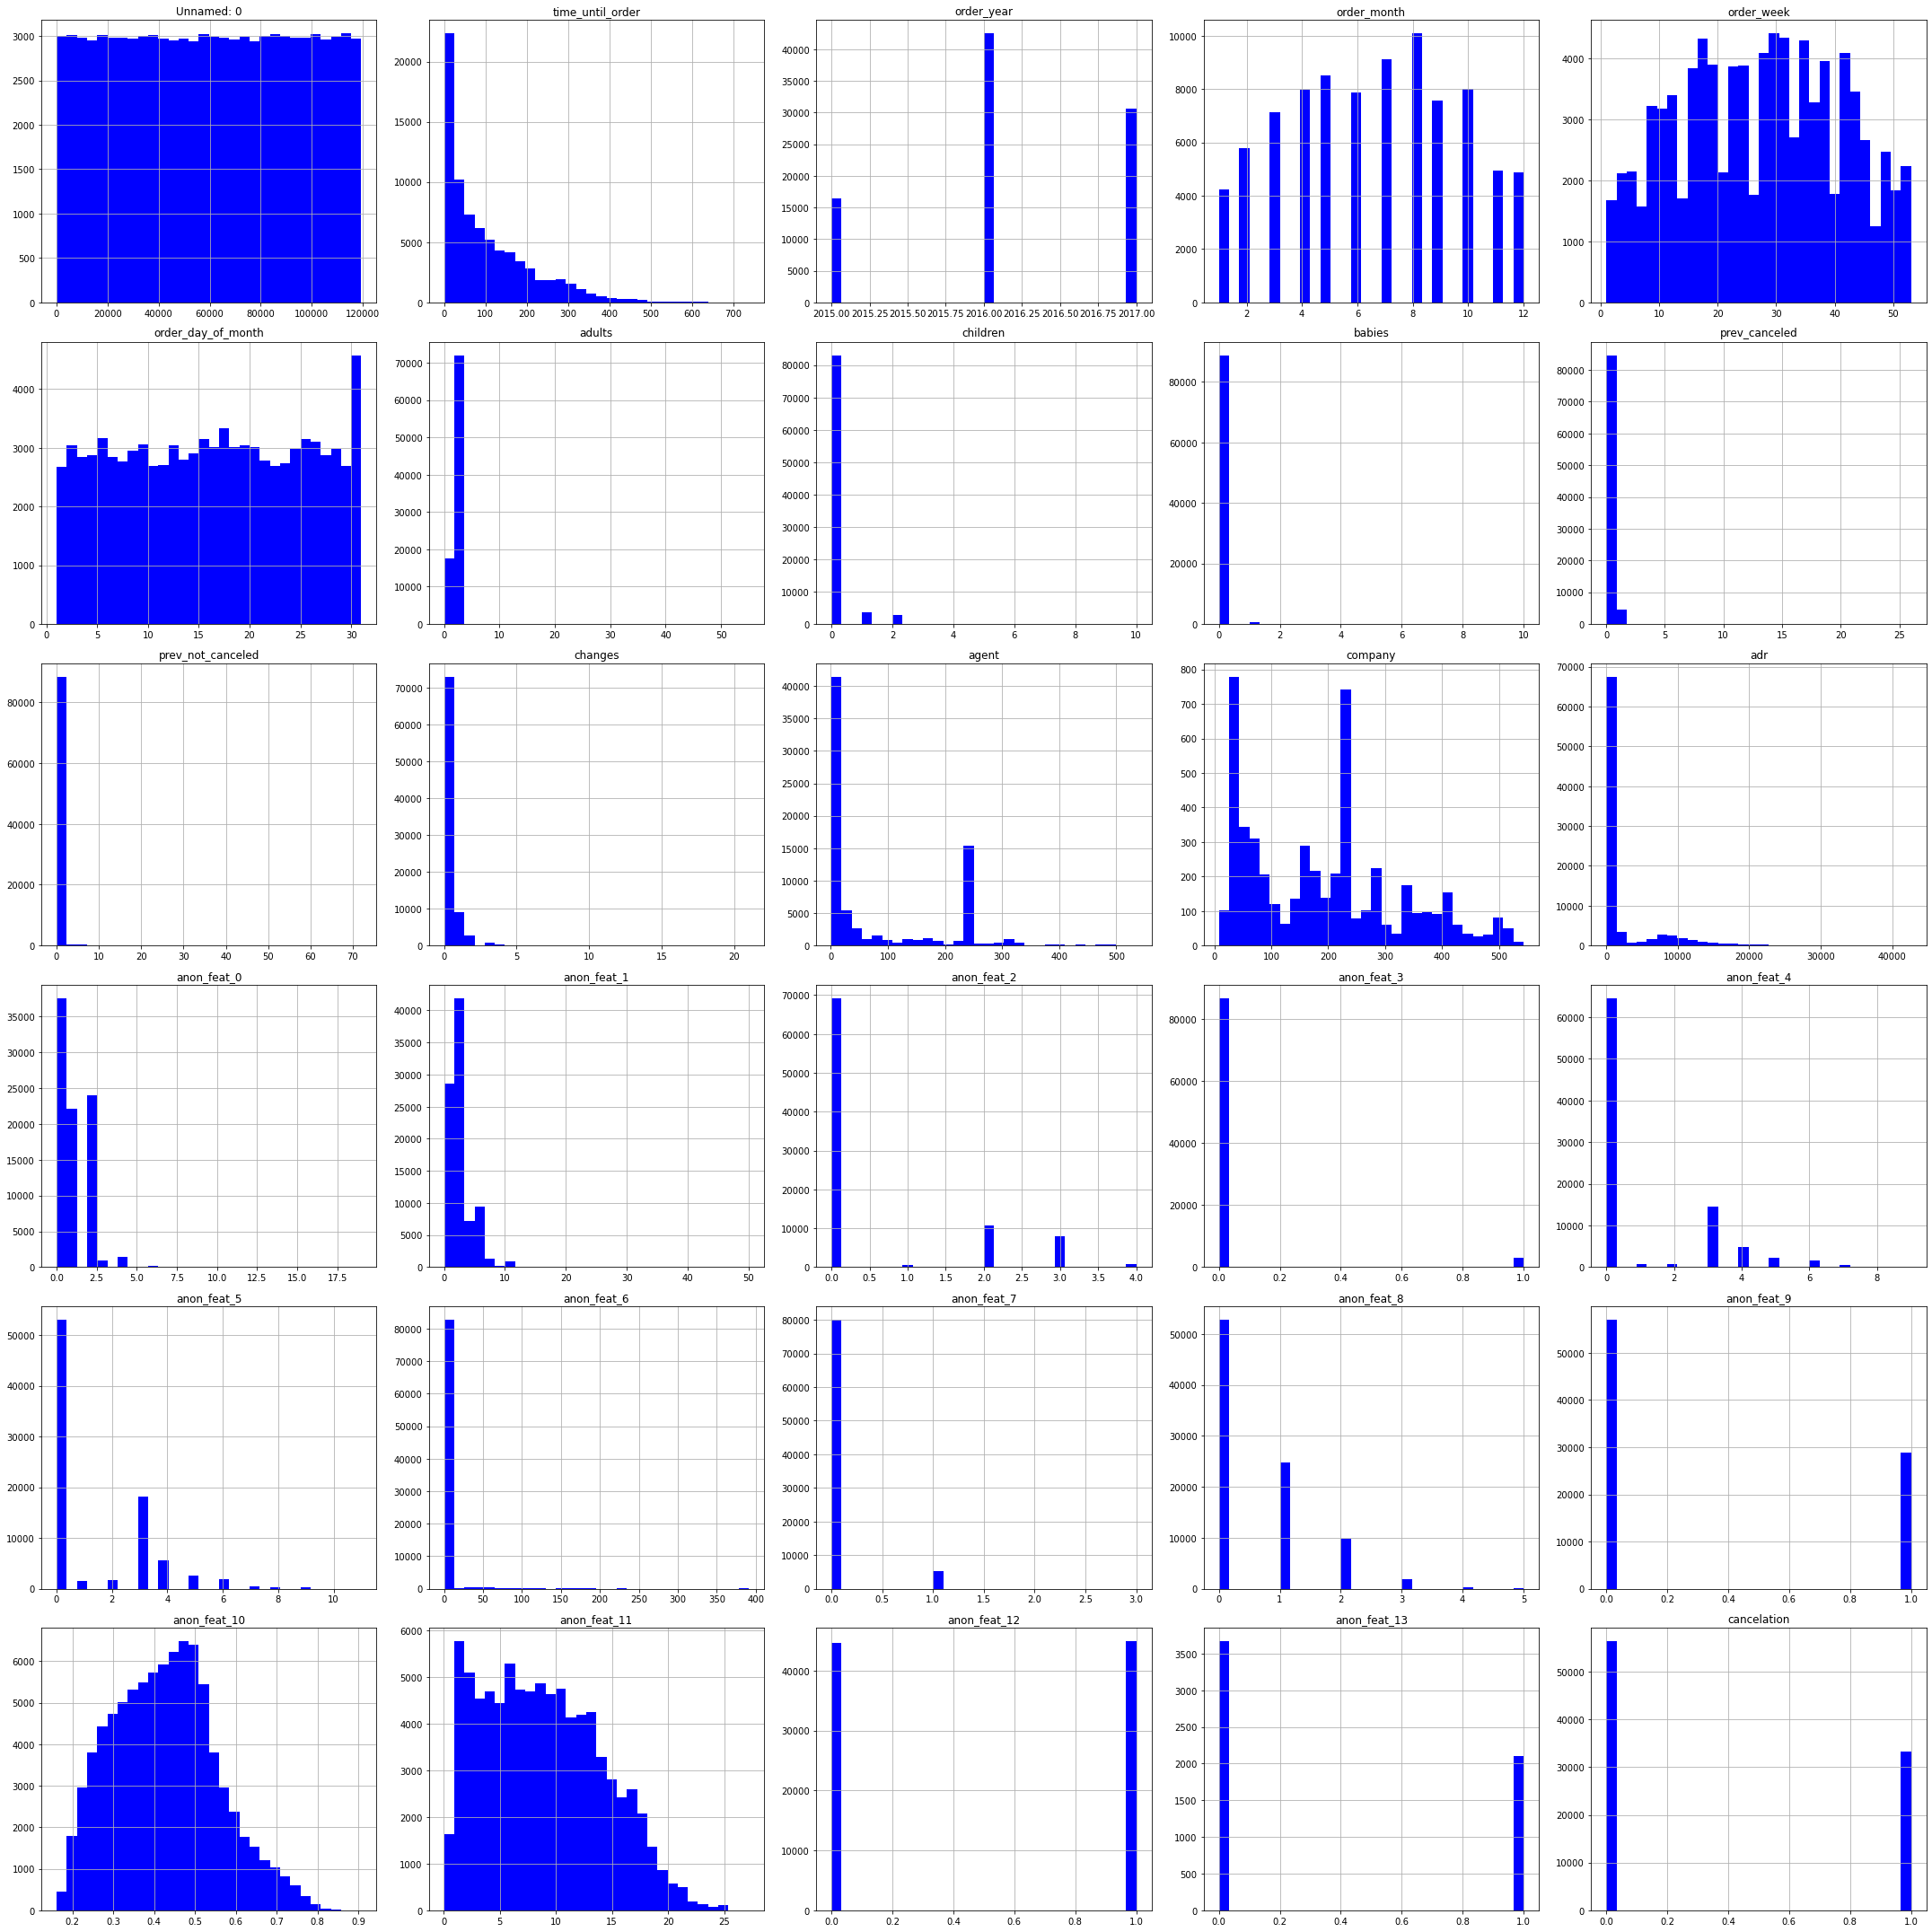

In [5]:
df.hist(figsize=(30,30), bins=30, color='dark')
plt.tight_layout()
plt.show()

<Figure size 2160x2160 with 0 Axes>

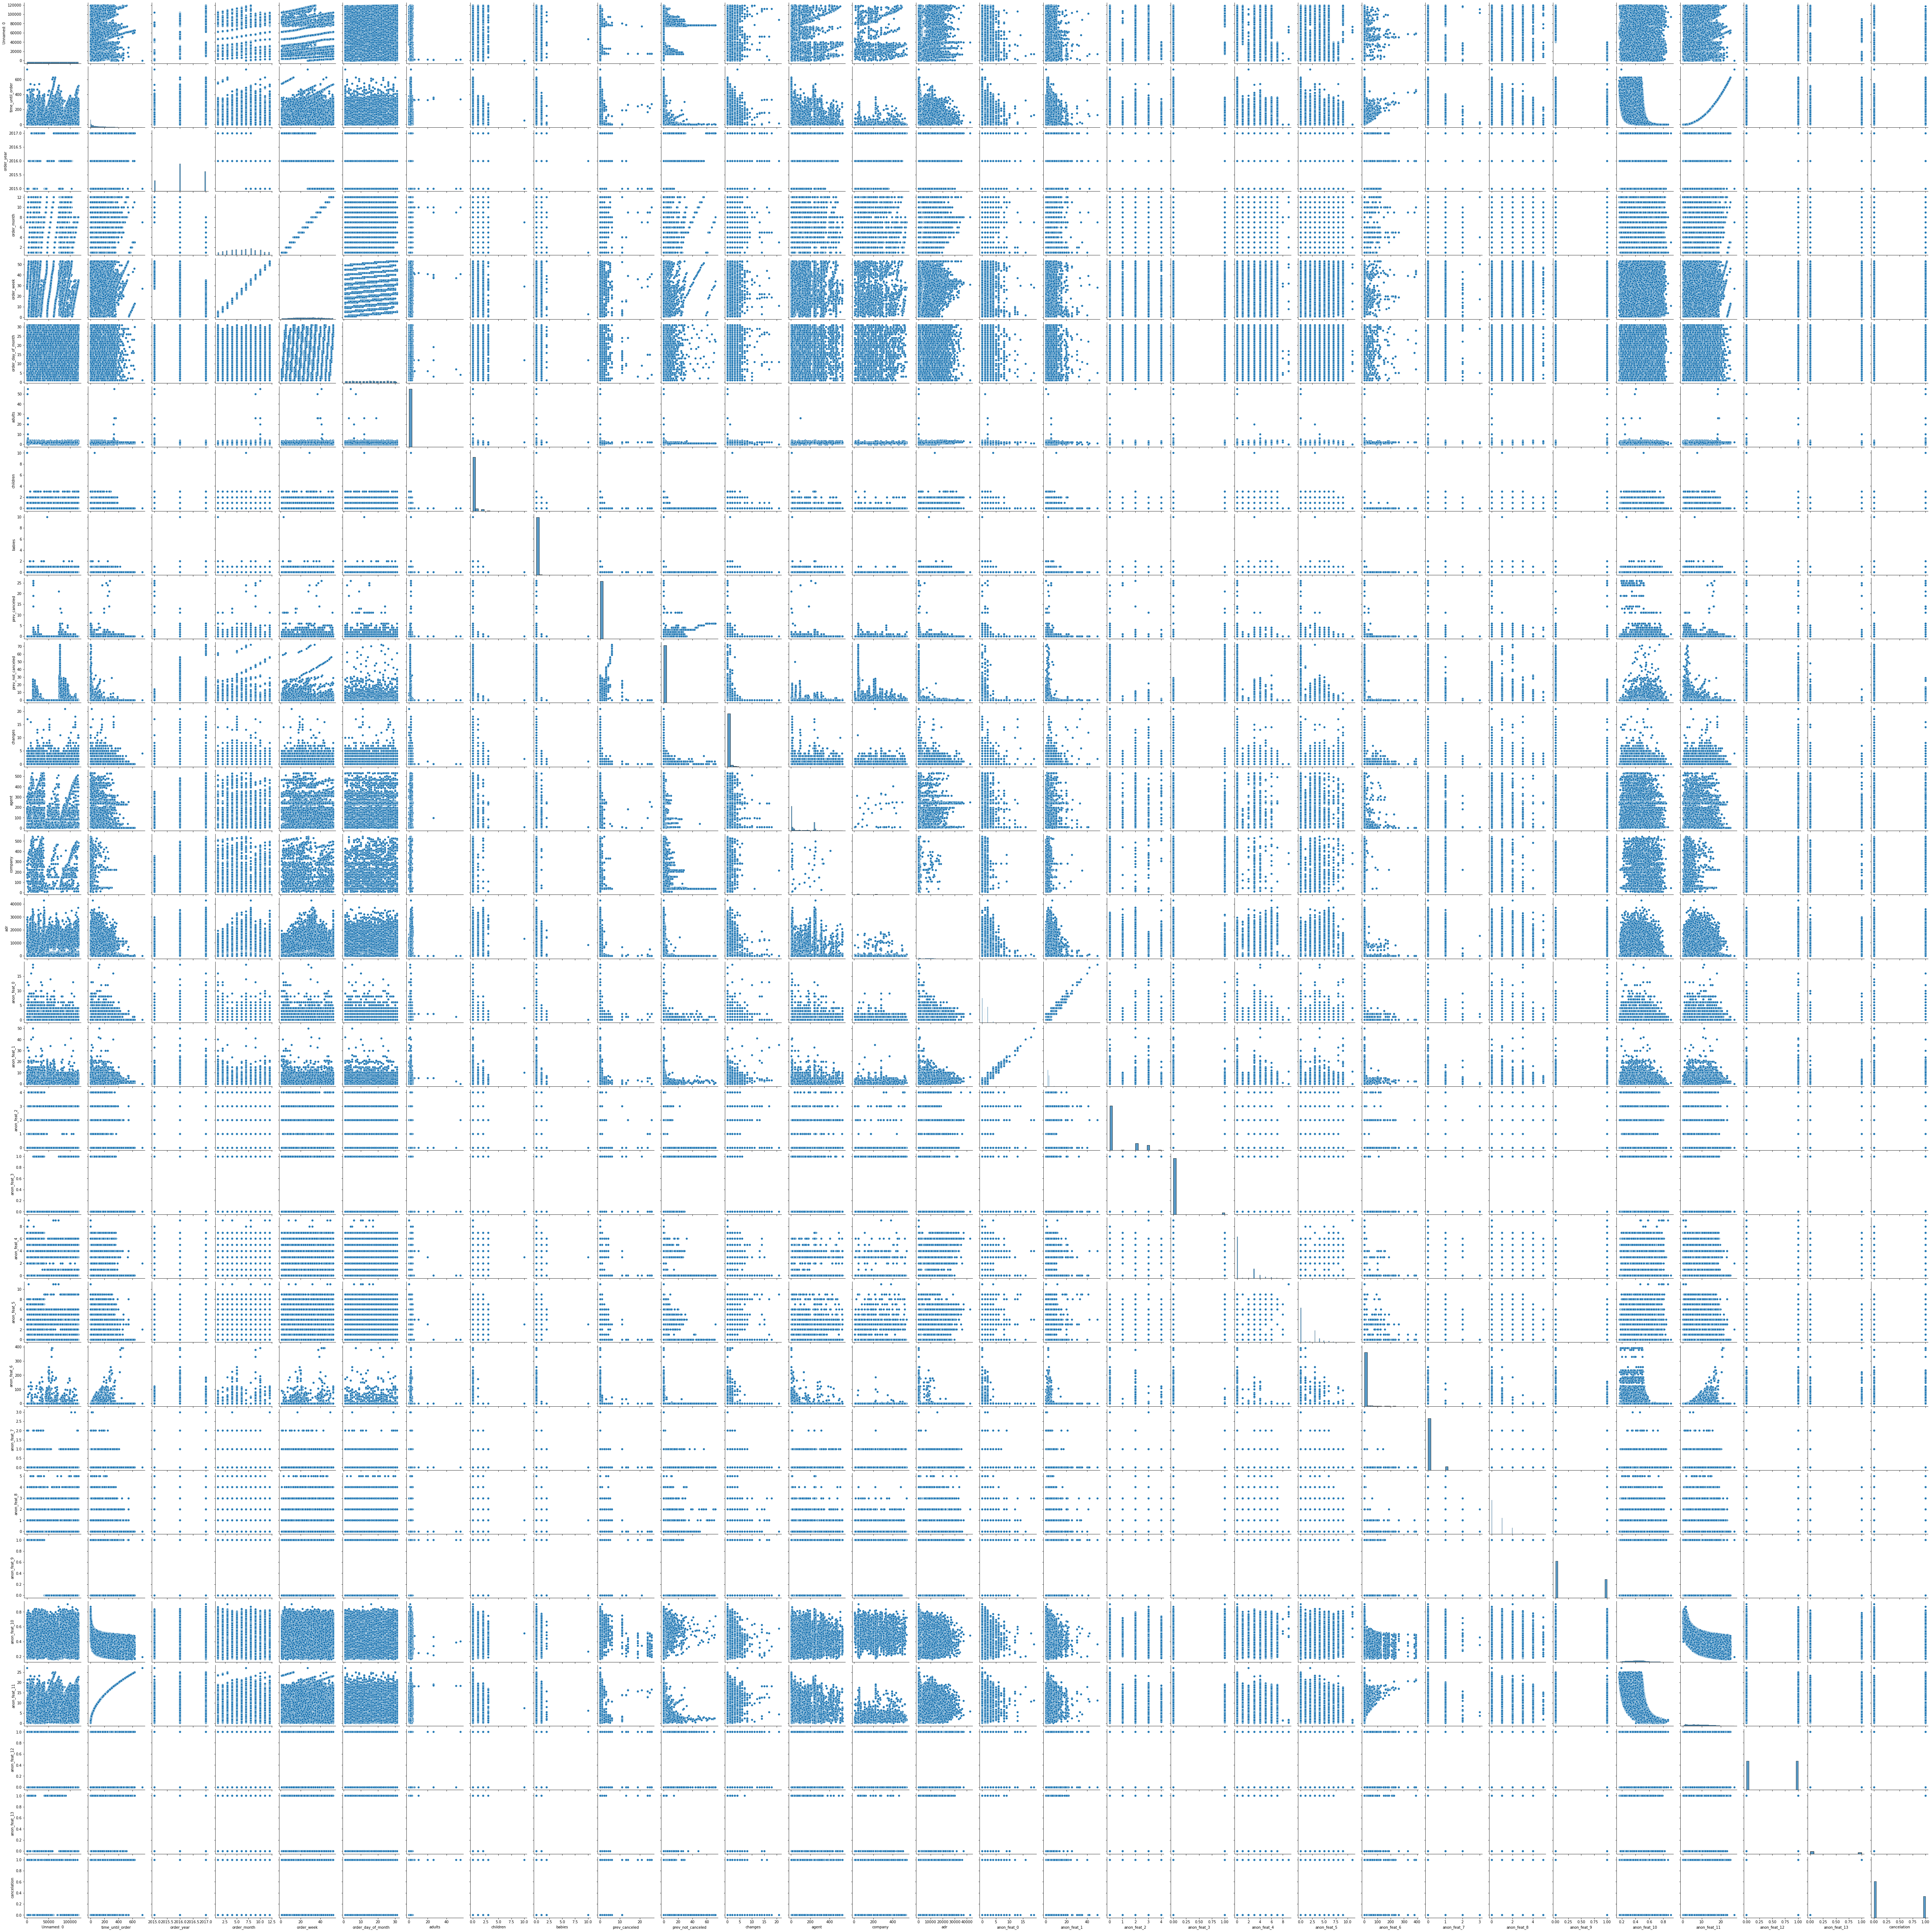

In [6]:
plt.figure(figsize=(30,30))
sns.pairplot(df)
plt.show()

## First Impression
### Correlation Matrix
This is a very first look over correlations. We would come back to this matrix later.

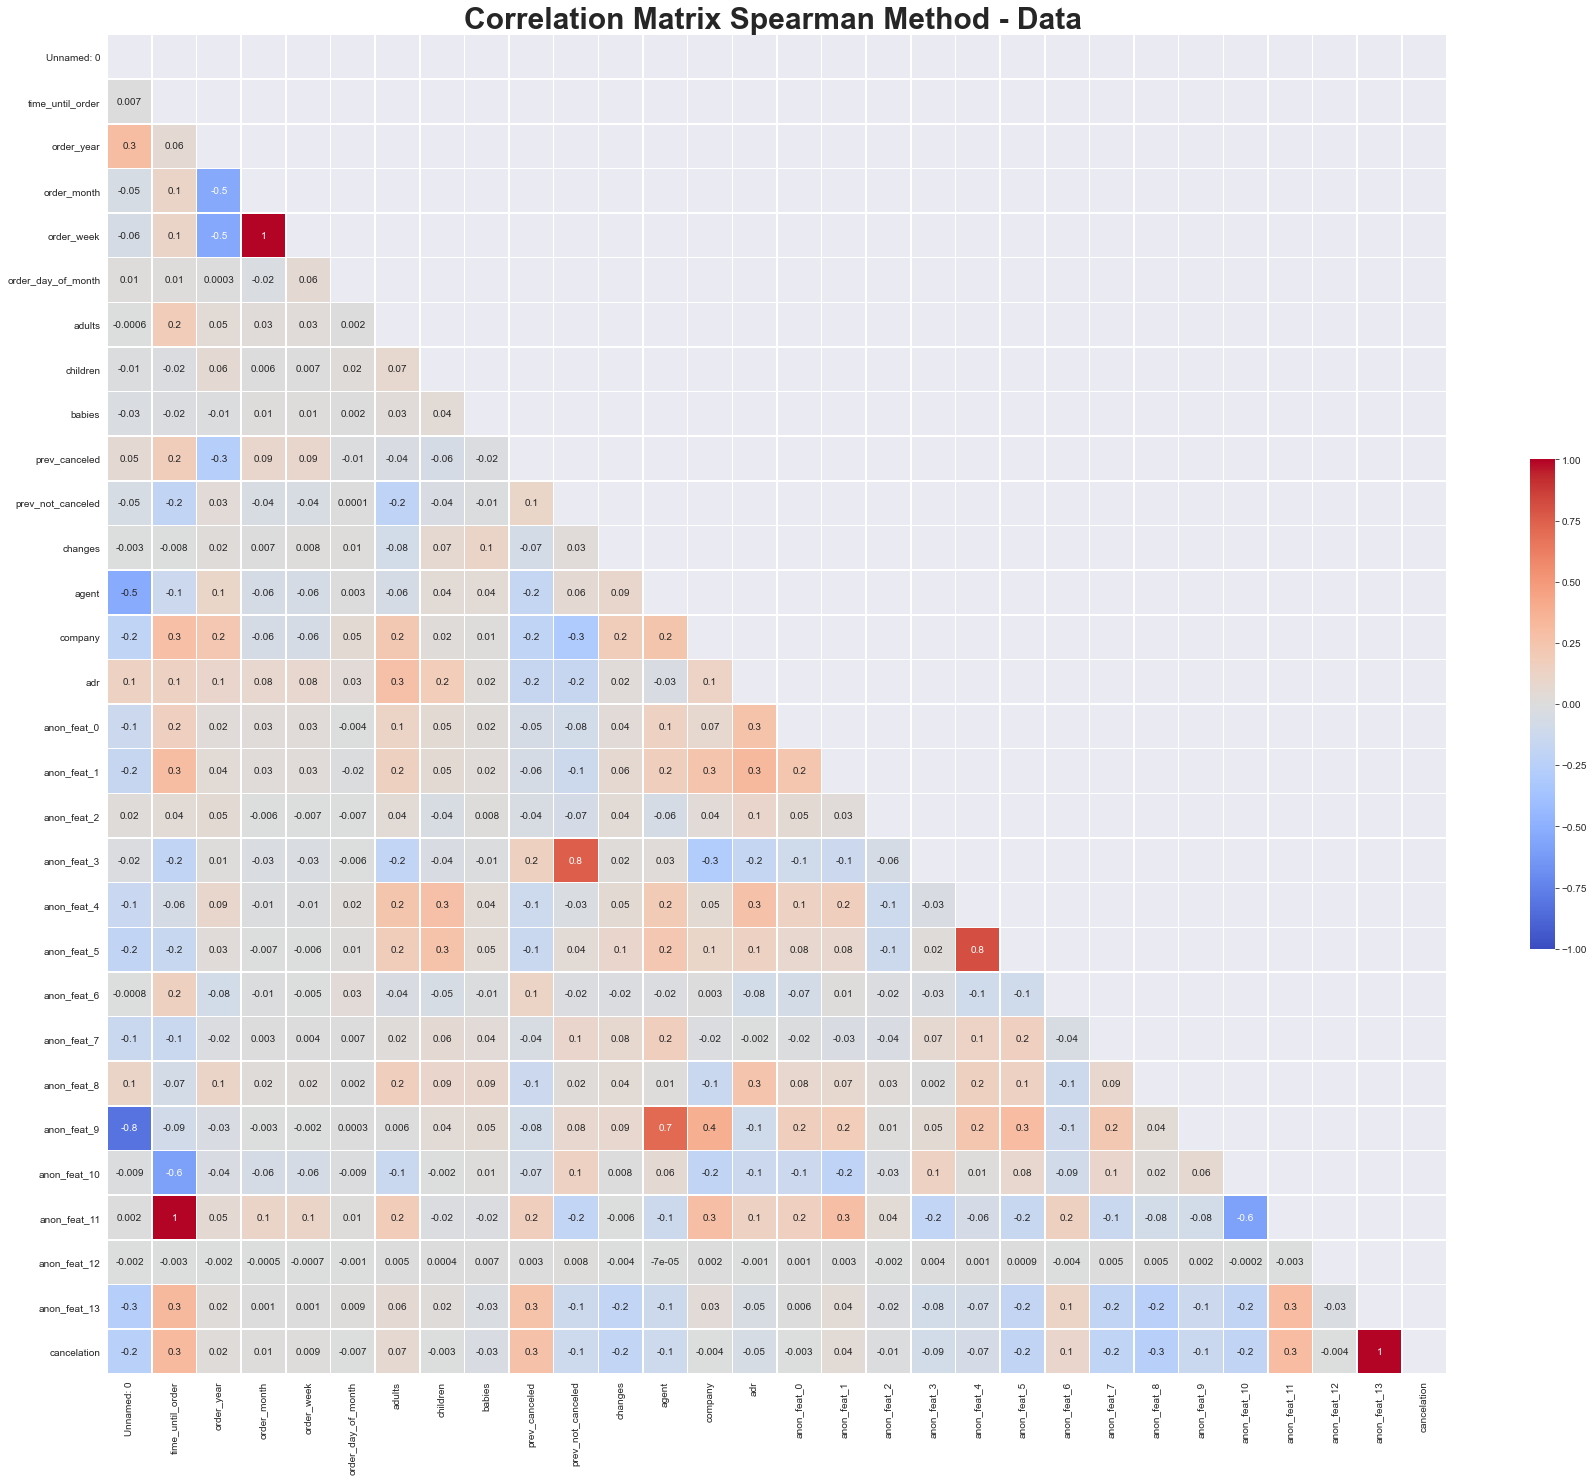

In [8]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
corr=df.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr, dtype=np.bool))
heat = sns.heatmap(corr, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'coolwarm', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":10},)
plt.title("Correlation Matrix Spearman Method - Data ",size=30, weight='bold')
plt.show()

### Analyzing the Correlation Matrix
#### From the Heatmap
Those are the top correlating values, above 55% of correlation.

In [9]:
corr = corr[corr>=0.55]
corr = corr.abs()
corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr

anon_feat_13       cancelation     1.000000
time_until_order   anon_feat_11    0.999476
order_month        order_week      0.995450
anon_feat_4        anon_feat_5     0.813804
prev_not_canceled  anon_feat_3     0.755504
agent              anon_feat_9     0.713712
dtype: float64

We have recognized a few suggested correlations:
<li>It is very clear that anon_feat_13 is actually the cancelling situation from the labels data, with a 100% correlation.
<li>anon feature 11 - time until order
<li>agent - anon feat 9
<li>anon feature 5 - anon feature 4
of course we can discard order month and order week.

## Relations of the Data to Label Data

It is important to understand at this stage what is the distribution of cancelation in
general and for specific features

Text(0, 0.5, 'Count')

<Figure size 2160x2160 with 0 Axes>

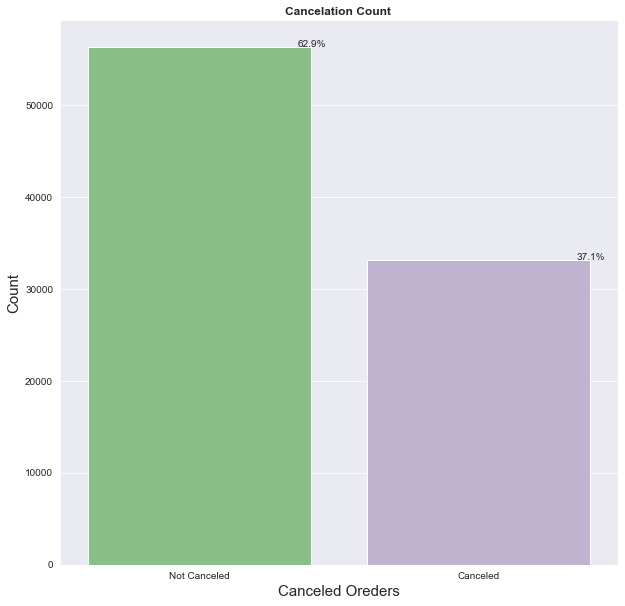

In [11]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.countplot(x='cancelation', data= df, palette='Accent',
                    orient = 'v')
bar.set_xticklabels(['Not Canceled', 'Canceled'])
sns.despine()
total = float(len(y))
for p in bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x1 = p.get_x() + p.get_width()
    y1 = p.get_height()
    bar.annotate(percentage, (x1, y1),ha='center')
bar.set_title('Cancelation Count ', weight='bold')
bar.set_xlabel('Canceled Oreders', fontsize=15)
bar.set_ylabel('Count', fontsize=15)

## Creating New Features
We have decided that a few manipulations can be done on the features from the begining.
We think some features can be discarded  completely, and some new ones should be created.

Features to create:
<li> Season - by year's months.
<li> Country Cancel Ratio
<li> Kids - bolean feature

After exploring and visualising the data we will discuss what features to drop.

This would be the season feature we chose to introduce, together with the "has_kids" boolean feature.

In [12]:
seasons = {1: "Spring", 2: "Summer", 3:"Autumn", 4: "Winter"}

In [13]:
def new_features(df):
    # Creating seasons
    df['season'] = df['order_month'].apply(month_num_season)
    # Creating "has_kids" feature
    df['has_kids'] = df['children'] > 0
    df['has_kids'] = df['has_kids'].astype(int)
    return df

df = new_features(df)

# Early Predictions and Ideas
## Exploring New Features

## Visualisation of the Data
### Seasons vs number of orders

Text(0, 0.5, 'Count')

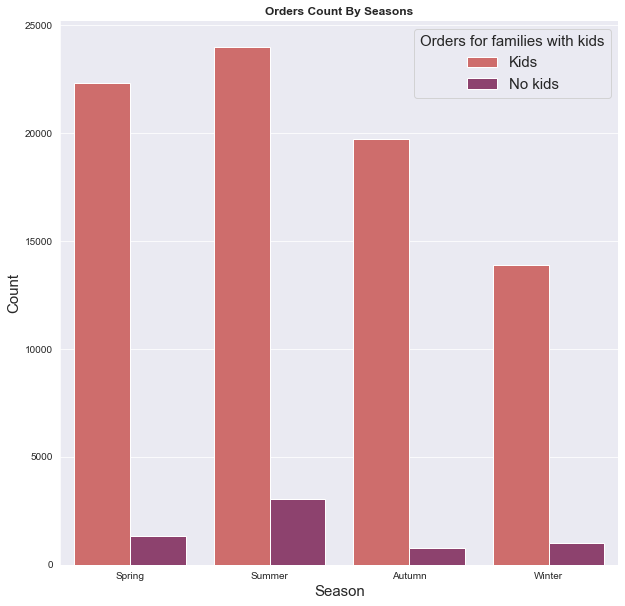

In [14]:
sns.set_style('darkgrid')
fig, bar = plt.subplots(figsize = (10,10))

bar = sns.countplot(x='season', hue='has_kids', data= df, palette='flare',
                    orient = 'v')
bar.set_xticklabels([sea for sea in seasons.values()])
sns.despine()
bar.legend(title='Orders for families with kids', labels=['Kids', 'No kids']
           ,loc='upper right',
           fontsize=15, title_fontsize=15)
bar.set_title('Orders Count By Seasons', weight='bold')
bar.set_xlabel('Season', fontsize=15)
bar.set_ylabel('Count', fontsize=15)

### Kids Number vs order month

Text(0, 0.5, '')

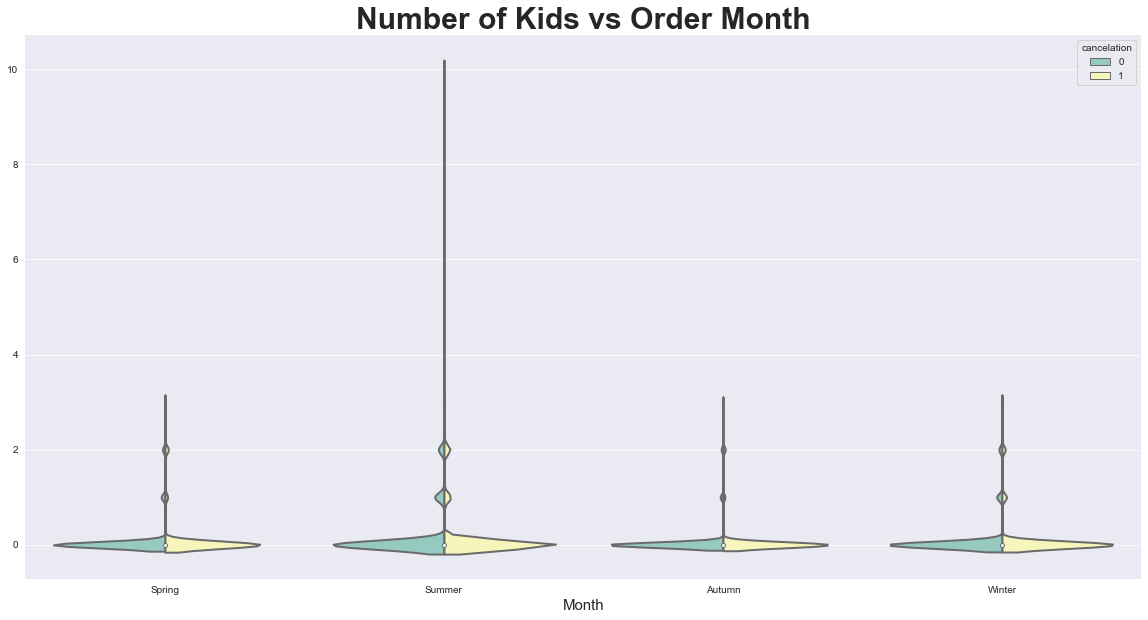

In [15]:
fig = plt.figure(figsize=(20,10))
vil = sns.violinplot(x='season', y ='children', hue='cancelation', data=df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Number of Kids vs Order Month', weight='bold',
          fontsize=30)
vil.set_xticklabels([sea for sea in seasons.values()])
plt.xlabel('Month', fontsize=15)
plt.ylabel('', fontsize=15)

### Kids Number vs Days Before Order

### Orders Count by Years

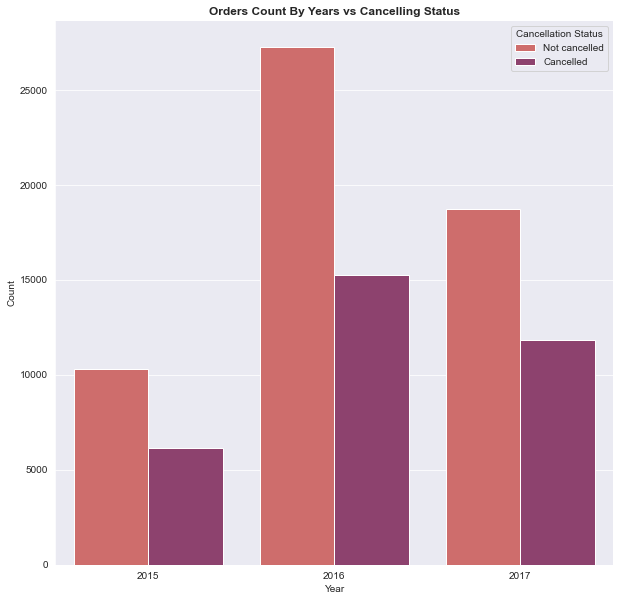

In [16]:
sns.set_style('darkgrid')
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.countplot(x='order_year',hue='cancelation', data= df, palette='flare',
                    orient = 'v')
sns.despine()
bar.set_title('Orders Count By Years vs Cancelling Status', weight='bold')
bar.set_xlabel('Year')
bar.set_ylabel('Count')
bar.legend(title='Cancellation Status', labels=['Not cancelled', 'Cancelled'])

### anon_feat 12 Distribution

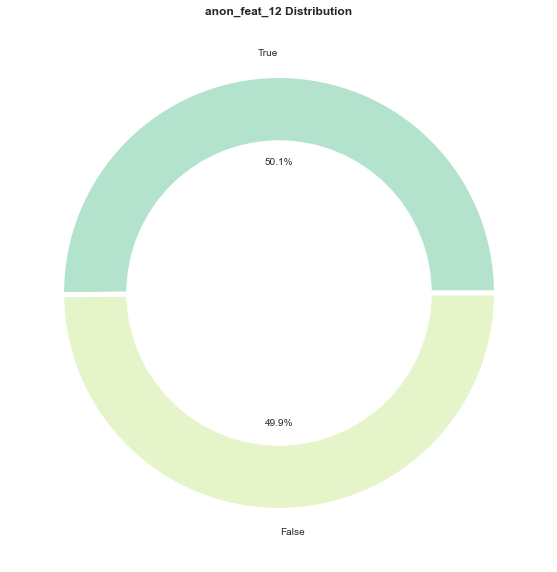

In [17]:
size = df['anon_feat_12'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
labels= ['True', 'False']
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, colors=colors, labels=labels,
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
        autopct="%.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('anon_feat_12 Distribution', weight='bold')
plt.show()

###  anon_feat 10 explored
We have noticed initially that anon_feat_10 has a certain histogram, here it is displayed with cancellation status

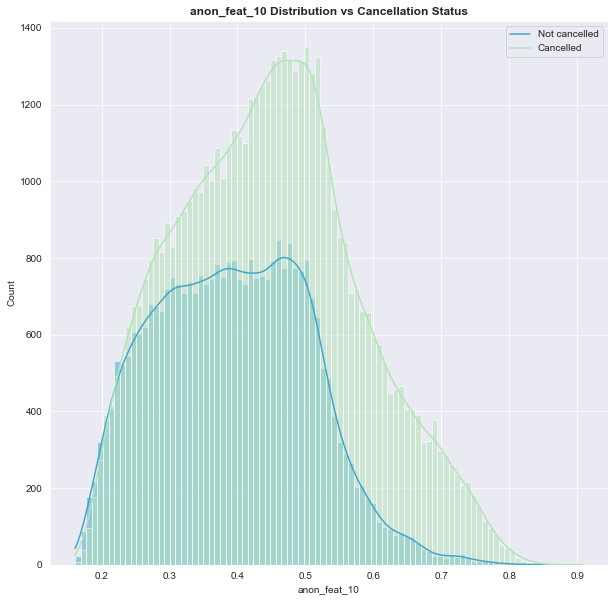

In [18]:
fig, bar = plt.subplots(figsize = (10,10))
sns.histplot(x='anon_feat_10', hue='cancelation', data=df, palette="GnBu", kde=True)
plt.title('anon_feat_10 Distribution vs Cancellation Status', weight='bold')
plt.legend(labels=['Not cancelled', 'Cancelled']) #TODO check this ! is it reversed?

###  Prev Canceled Effect on Changes made

Text(0.5, 1.0, 'Changes made vs Previously cancelled')

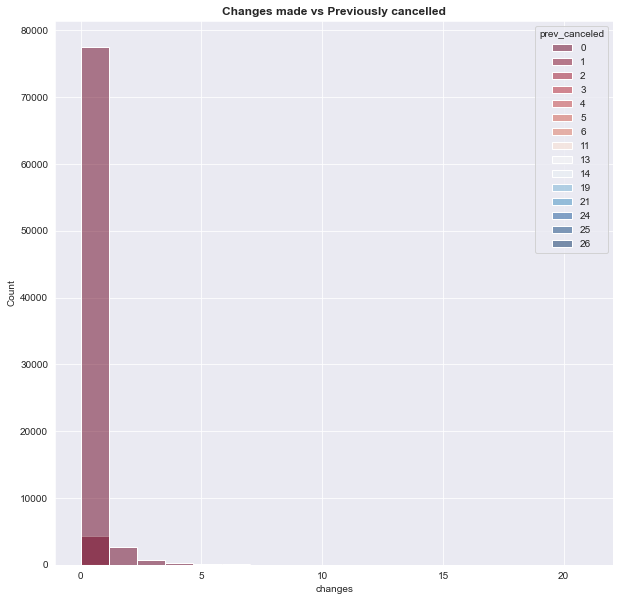

In [19]:
# TODO remove this, not very informational

fig, bar = plt.subplots(figsize = (10,10))
sns.histplot(x='changes', hue='prev_canceled' ,data=df, palette="RdBu")
plt.title('Changes made vs Previously cancelled', weight='bold')
# plt.legend(labels=['Not cancelled', 'Cancelled'])

### Time Until Order vs Cancellation Status

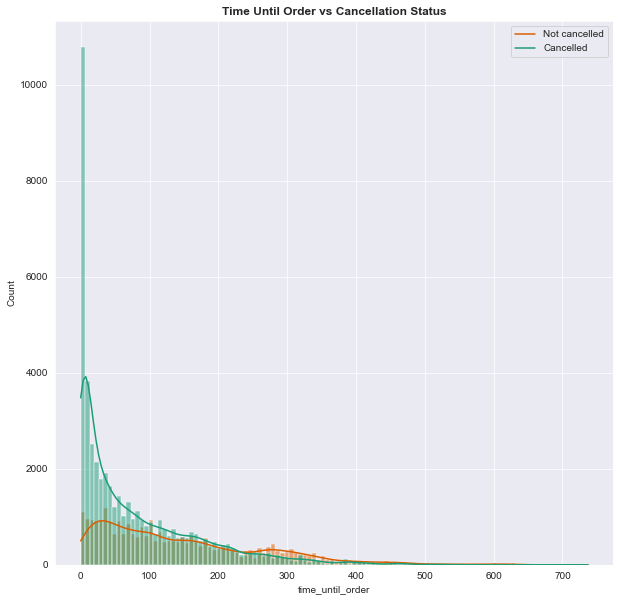

In [20]:
fig, bar = plt.subplots(figsize = (10,10))
sns.histplot(x='time_until_order', hue='cancelation', data=df, palette="Dark2", kde=True)
plt.title('Time Until Order vs Cancellation Status', weight='bold')
plt.legend(labels=['Not cancelled', 'Cancelled'])

###  Top 10 Countries by Orders and Seasons

Text(0, 0.5, 'Count')

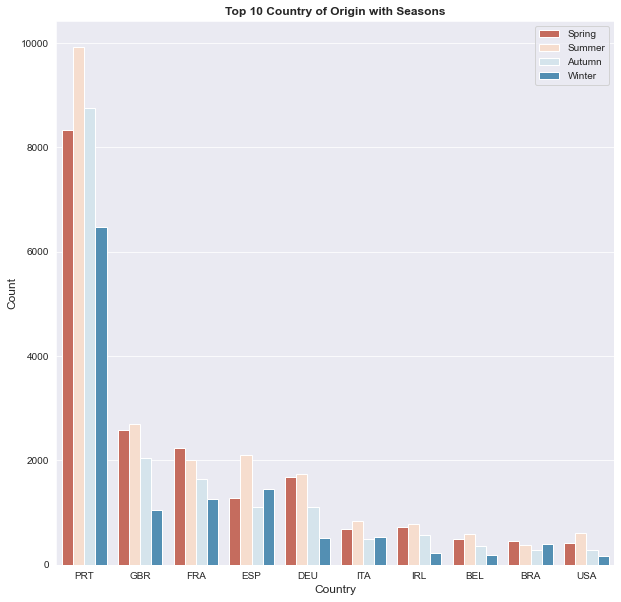

In [21]:
fig, bar = plt.subplots(figsize = (10,10))
sns.countplot(x='country',hue='season', data=df,
              order=pd.value_counts(df['country']).iloc[:10].index, palette="RdBu")
plt.title('Top 10 Country of Origin with Seasons', weight='bold')
plt.legend(labels=[season for season in seasons.values()])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

It is interesting to see that a big percent of the orders were made from very few countries. We can use that in order
to research our model only for a few countries, in order to lower dimensionality after encoding countries.
We are going to use this fact and see what countries had the most orders not cancelled, then we can use this this fact
to reduce the number of unique values for this feature.

In [22]:
# Getting the top 10 uncancelled orders

top_un_cancelled = df[df['cancelation'] == 1]['country'].iloc[:10].tolist()

Text(0, 0.5, 'Count')

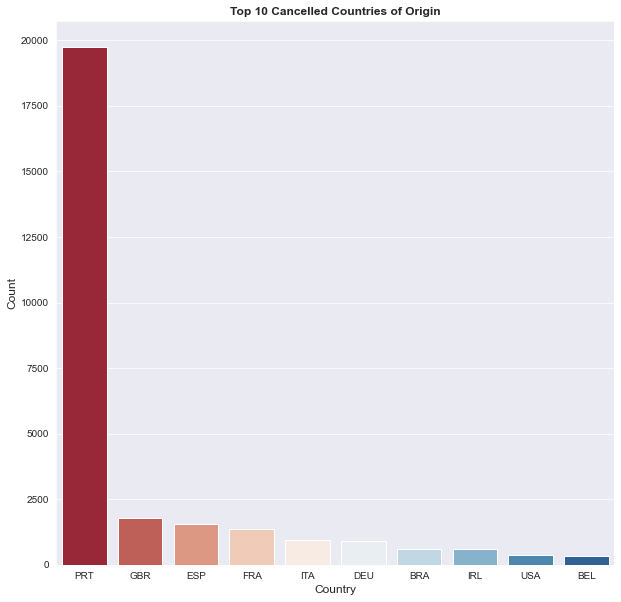

In [23]:
fig, bar = plt.subplots(figsize = (10,10))
sns.countplot(x='country' ,data=df[df['cancelation'] == 1],
              order=pd.value_counts(df[df['cancelation'] == 1]['country']).iloc[:10].index, palette="RdBu")
plt.title('Top 10 Cancelled Countries of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

To do this, we are going to present an idea: check for each country the ratio of cancellations and create
a new numeric feature to replace countries.

In [24]:
temp = df[df['cancelation'] != 1]
cancel_ratio = temp['country'].value_counts()/df['country'].value_counts()
country_cancel_ratio_key = cancel_ratio.to_dict()
df['country_cancel_ratio'] = df['country'].map(country_cancel_ratio_key)

In [25]:
cancel_ratio.sort_values(ascending=False).head(50)

ABW    1.000000
COM    1.000000
CUB    1.000000
GTM    1.000000
GUY    1.000000
IRQ    1.000000
JAM    1.000000
LAO    1.000000
LBY    1.000000
LCA    1.000000
LKA    1.000000
MDG    1.000000
MRT    1.000000
MWI    1.000000
NAM    1.000000
PAN    1.000000
PLW    1.000000
PRY    1.000000
PYF    1.000000
SDN    1.000000
SLE    1.000000
SMR    1.000000
STP    1.000000
SUR    1.000000
SYR    1.000000
TGO    1.000000
TMP    1.000000
UGA    1.000000
VNM    1.000000
CRI    1.000000
KNA    1.000000
BFA    1.000000
CMR    1.000000
ASM    1.000000
ATA    1.000000
ATF    1.000000
CAF    1.000000
BWA    1.000000
BDI    1.000000
BRB    1.000000
BOL    1.000000
SRB    0.972222
ISL    0.947368
NZL    0.913793
LTU    0.905660
MYS    0.894737
PER    0.888889
PRI    0.888889
JPN    0.869863
LVA    0.868421
Name: country, dtype: float64

This is another interesting finding, some countries have almost a 100% of no-cancellation ratio.

In [26]:
# sns.set_style('darkgrid')
# fig, bar = plt.subplots(figsize = (10,10))
# bar = sns.stripplot(x='country', y='country_cancel_ratio', data= df, palette='flare',
#                     orient = 'v')

###  Acquisition Channel vs Cancellation Count

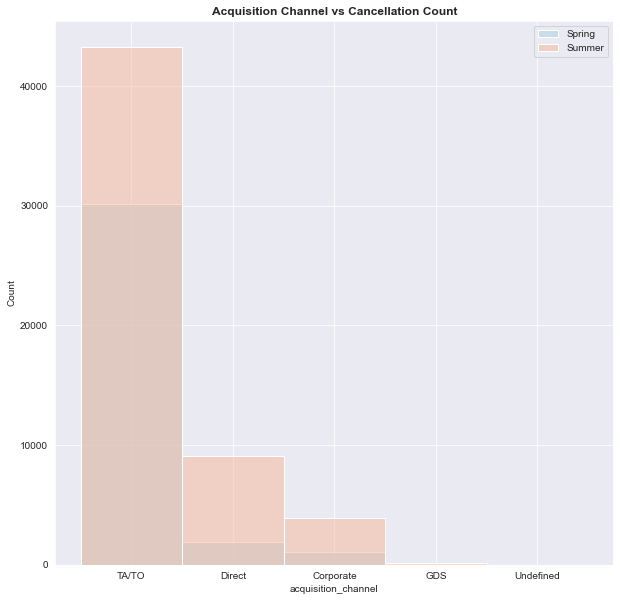

In [27]:
fig, bar = plt.subplots(figsize = (10,10))
sns.histplot(x='acquisition_channel',hue='cancelation', data=df, palette="RdBu")
plt.title('Acquisition Channel vs Cancellation Count', weight='bold')
plt.legend(labels=[season for season in seasons.values()])

### Order Type

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

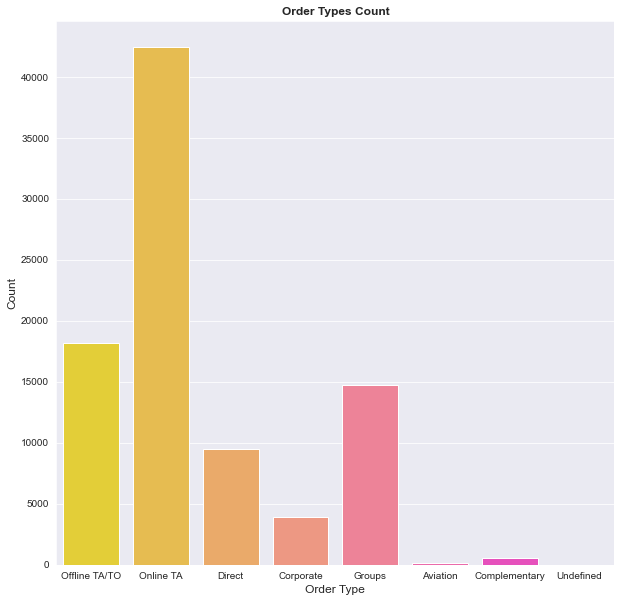

In [28]:
fig, bar = plt.subplots(figsize = (10,10))
sns.countplot(df['order_type'], palette='spring_r')
plt.title('Order Types Count', weight='bold')
plt.xlabel('Order Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

I is pretty apparent that having both acquisition channel and order type features will
be redundant because they are very similar in content and in values.

# Part 2: Preprocessing
## Answers for Part 2 questions
<br>
1. People who have deleted their orders more than 20 times.
  family with 10 kids that ordered a hotel
  -those cases are possible but they are outliers, therefore, we moved only the features that have more than 50% missing values
<br>
2. The data is not scaled.  scaling is essential for machine learning algorithms that calculate distances between data.
 If not scale, the feature with a higher value range starts dominating when calculating distances.
<br>
3. There are 253577 missing values in the dataframe. we chose to move only the features that with more than 50% missing values
have
<br>
4. The problem has more than 30  features for each row. big dimensionality can affect the predictions' accuracy.

## Feature Engineering

### Handling nan Data

First let's see how much is actually missing:

Text(0.5, 1.0, 'Missing Data')

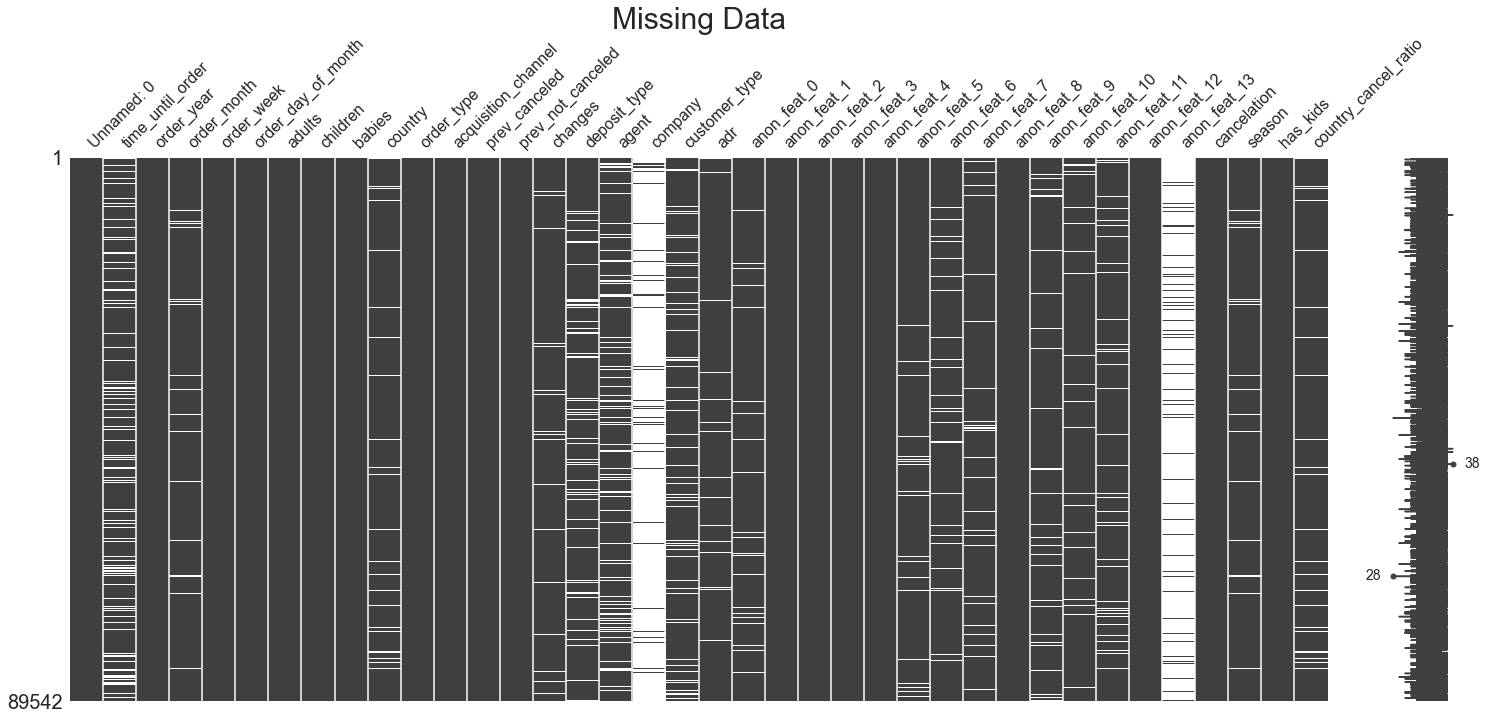

In [29]:
msno.matrix(df)
plt.title('Missing Data', fontsize=30)

We also chose to remove features of more than 50% nulls.
It is important to note as well, that the cancellation data has no missing values.
We will now drop this column from the main df:

In [30]:
df = df.drop('cancelation', axis='columns')

And now we would remove the missing data columns as discussed

In [31]:
# drop columns of high "null percent"
def null_df(df):
    drop_col = df.isnull().sum().divide(df.shape[0])
    drop_col = list(drop_col[drop_col>0.5].index)
    df = df.drop(drop_col, axis='columns')
    return df

df = null_df(df)

# Removing acquisition channel (has less unique row values)

df = df.drop('order_type', axis='columns')

After removing those problematic values we need to examine what is left:

In [32]:
df.isnull().sum().divide(df.shape[0]).round(8).astype(str) + "%"

Unnamed: 0                     0.0%
time_until_order        0.14162069%
order_year                     0.0%
order_month             0.03835072%
order_week                     0.0%
order_day_of_month             0.0%
adults                         0.0%
children                 4.467e-05%
babies                         0.0%
country                 0.04848004%
acquisition_channel            0.0%
prev_canceled                  0.0%
prev_not_canceled              0.0%
changes                 0.03883094%
deposit_type             0.1005785%
agent                   0.13620424%
customer_type            0.1105068%
adr                     0.03331398%
anon_feat_0             0.03775882%
anon_feat_1                    0.0%
anon_feat_2                    0.0%
anon_feat_3                    0.0%
anon_feat_4                    0.0%
anon_feat_5             0.04502915%
anon_feat_6              0.0472739%
anon_feat_7             0.04744142%
anon_feat_8                    0.0%
anon_feat_9              0.0

We can observe that the missing values are a very small percent of the data. We searched for the
most common values and used it to fill the missing

In [33]:
df.mode().head(1).squeeze()

Unnamed: 0                       0
time_until_order               0.0
order_year                  2016.0
order_month                    8.0
order_week                    33.0
order_day_of_month            17.0
adults                         2.0
children                       0.0
babies                         0.0
country                        PRT
acquisition_channel          TA/TO
prev_canceled                  0.0
prev_not_canceled              0.0
changes                        0.0
deposit_type            No Deposit
agent                          9.0
customer_type            Transient
adr                           62.0
anon_feat_0                    0.0
anon_feat_1                    2.0
anon_feat_2                    0.0
anon_feat_3                    0.0
anon_feat_4                    0.0
anon_feat_5                    0.0
anon_feat_6                    0.0
anon_feat_7                    0.0
anon_feat_8                    0.0
anon_feat_9                    0.0
anon_feat_10        

In [34]:
#Data imputer function

def impute_data(df):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    for feature in df.columns:
        imp.fit(df[feature].values.reshape(-1,1))
        df[feature] = imp.transform(df[feature].values.reshape(-1,1))
    return df

Text(0.5, 1.0, 'Missing Data')

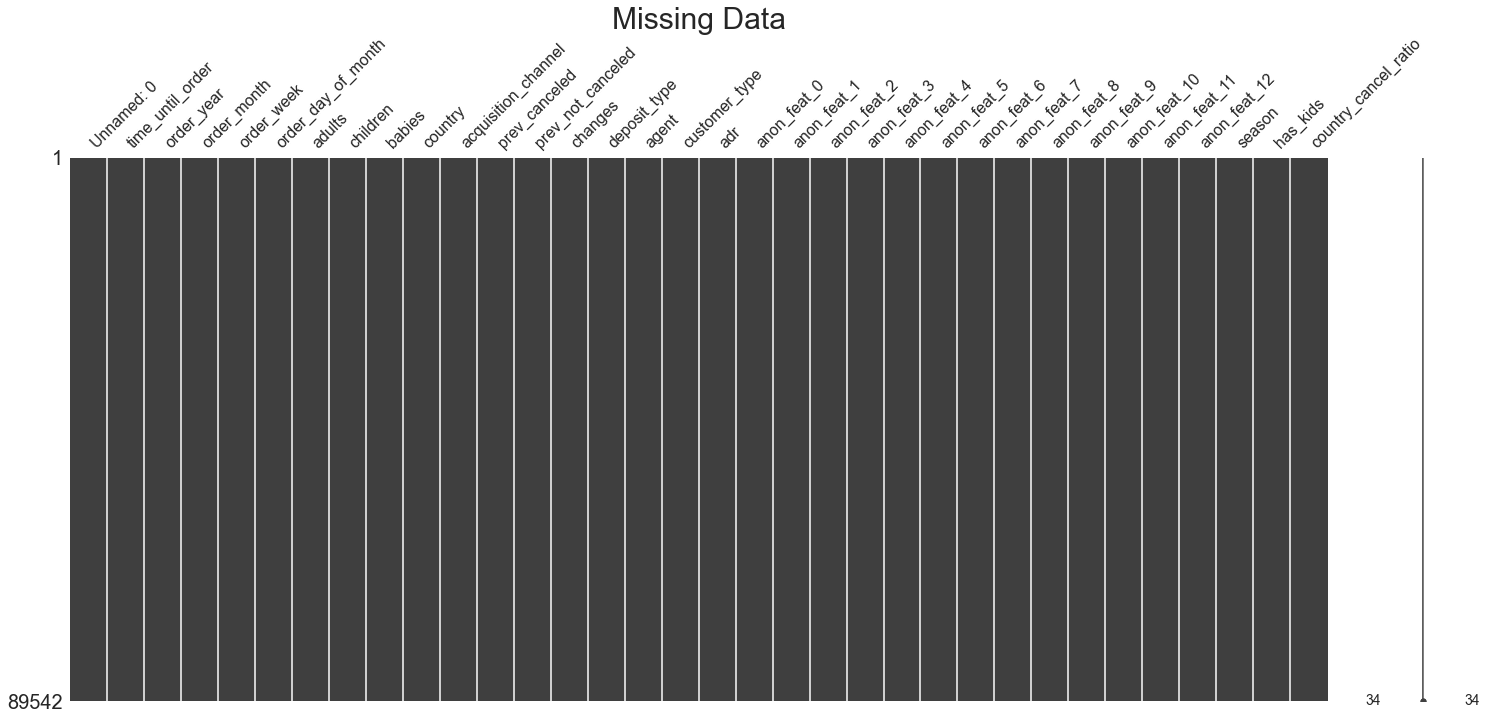

In [35]:
df = impute_data(df)
msno.matrix(df)
plt.title('Missing Data', fontsize=30)

### Dealing with Categorical Data
Before turning to encoding the categorical data, we need to consider discarding some features for the further proccesing.
Here is also the point of which we chose to drop some features due to our cunclisions so far:

In [36]:
# Categorical Data handling

features_dropped = ['Unnamed: 0','children', 'babies',
                    'order_week', 'order_month', 'order_day_of_month',
                    'anon_feat_11', 'country',]

categorical_cols_for_encode = ['acquisition_channel',
                    'customer_type','deposit_type']

def cat_label(df):
    enc = ce.OneHotEncoder(cols = categorical_cols_for_encode)
    df_bin = enc.fit_transform(df)
    return df_bin

df_encoded = cat_label(df.drop(features_dropped, axis='columns'))

C:\Users\PC\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
numerical_cols = df.columns.drop(categorical_cols_for_encode).drop(features_dropped)
print("Numberical Columns: ", numerical_cols)
bol_cols = df_encoded.columns.drop(numerical_cols)
print("Categorical Columns: ", bol_cols)
df_bol = df_encoded[bol_cols]
df_numerical = df_encoded[numerical_cols]

Numberical Columns:  Index(['time_until_order', 'order_year', 'adults', 'prev_canceled',
       'prev_not_canceled', 'changes', 'agent', 'adr', 'anon_feat_0',
       'anon_feat_1', 'anon_feat_2', 'anon_feat_3', 'anon_feat_4',
       'anon_feat_5', 'anon_feat_6', 'anon_feat_7', 'anon_feat_8',
       'anon_feat_9', 'anon_feat_10', 'anon_feat_12', 'season', 'has_kids',
       'country_cancel_ratio'],
      dtype='object')
Categorical Columns:  Index(['acquisition_channel_1', 'acquisition_channel_2',
       'acquisition_channel_3', 'acquisition_channel_4',
       'acquisition_channel_5', 'deposit_type_1', 'deposit_type_2',
       'deposit_type_3', 'customer_type_1', 'customer_type_2',
       'customer_type_3', 'customer_type_4'],
      dtype='object')


## Another Look on Correlation Matrices
### Categorical Features Correlation Matrix

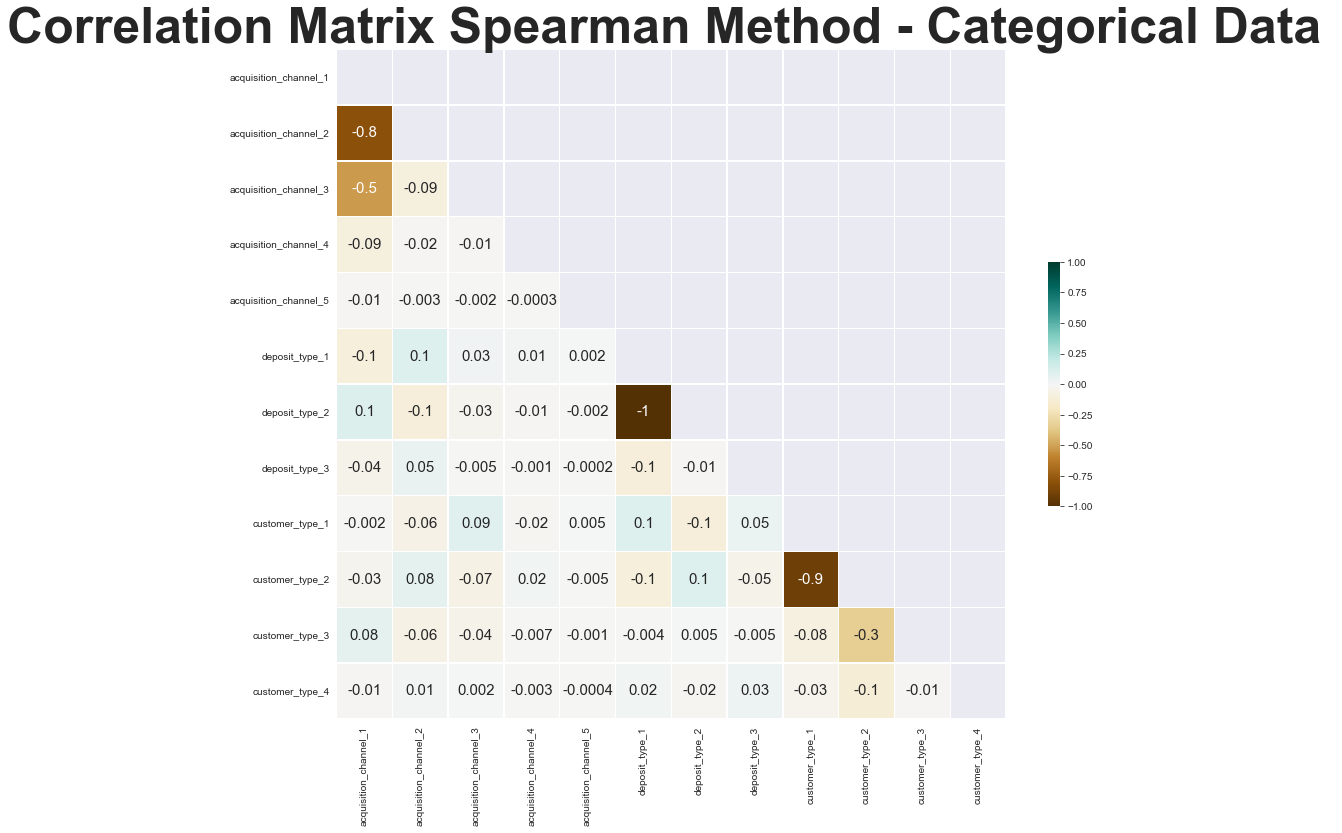

In [38]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
corr_cat = df_bol.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr_cat, dtype=np.bool))
heat = sns.heatmap(corr_cat, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'BrBG', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":15},)
plt.title("Correlation Matrix Spearman Method - Categorical Data ",size=50, weight='bold')
plt.show()

#### Top Correlations for Categorical Values

In [39]:
upper_corr_mat = corr_cat.where(
    np.triu(np.ones(corr_cat.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values(ascending=False)
sorted_mat

deposit_type_2         acquisition_channel_1    0.106854
customer_type_2        deposit_type_2           0.101032
customer_type_1        deposit_type_1           0.099981
deposit_type_1         acquisition_channel_2    0.095810
customer_type_1        acquisition_channel_3    0.087107
                                                  ...   
customer_type_3        customer_type_2         -0.330504
acquisition_channel_3  acquisition_channel_1   -0.517292
acquisition_channel_2  acquisition_channel_1   -0.798596
customer_type_2        customer_type_1         -0.899339
deposit_type_2         deposit_type_1          -0.993283
Length: 66, dtype: float64

### Numerical Features Correlation Matrix

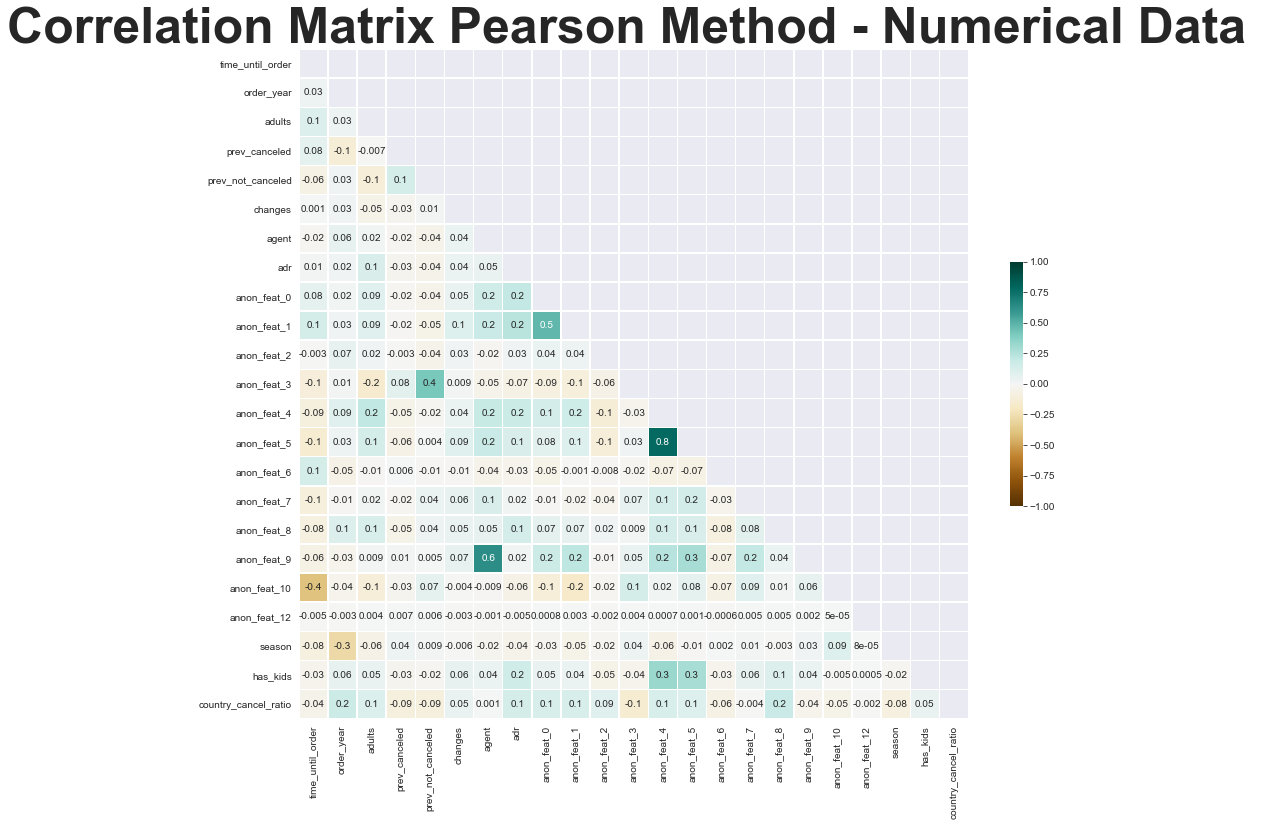

In [40]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
corr_num = df_numerical.corr(method='pearson')
mask_corr = np.triu(np.ones_like(corr_num, dtype=np.bool))
heat = sns.heatmap(corr_num, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'BrBG', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":10},)
plt.title("Correlation Matrix Pearson Method - Numerical Data ",size=50, weight='bold')
plt.show()

#### Top Correlations for Numerical Values

In [41]:
corr_num = corr_num[corr_num>=0.55].abs()
corr_num = (corr_num.where(np.triu(np.ones(corr_num.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr_num

anon_feat_4  anon_feat_5    0.786298
agent        anon_feat_9    0.638765
dtype: float64

## Applying Features Engineering Functions to Data Test

In [42]:
# change to pipeline

def process_data(df):
    df = numbers_to_str(df)
    df = null_df(df)
    df = new_features(df)
    df = impute_data(df)
    df = cat_label(df)

    return df

# Part 3: Modelling

## Splitting the Data
At this stage we would like to split the data before further manipulations are done.

In [43]:
#Splitting the data
X = df_encoded

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

modeling_sets = [X_train, X_test, y_train, y_test]

# Dealing with outliers

In [45]:
num_train = X_train.select_dtypes(include=["number"])
cat_train = X_train.select_dtypes(exclude=["number"])
idx = np.all(stats.zscore(num_train) < 3, axis=1)
X_train = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)
y_train = y_train.loc[idx]

## Scaling the Data
The data will be scaled using the pipeline element down the way.

In [47]:
standardScalerX = StandardScaler()
X_train_scaled = standardScalerX.fit_transform(X_train)
X_test_scaled = standardScalerX.transform(X_test)

## Exploring the Train Data Correlations with y

## PCA Testing - Dimensionality

In [48]:
pca = PCA()
data_for_PCA = (X_train_scaled-X_train_scaled.mean()/(X_train_scaled.std()))
X_train_pca = pca.fit_transform(data_for_PCA)

Text(0.5, 0, 'Dimensions')

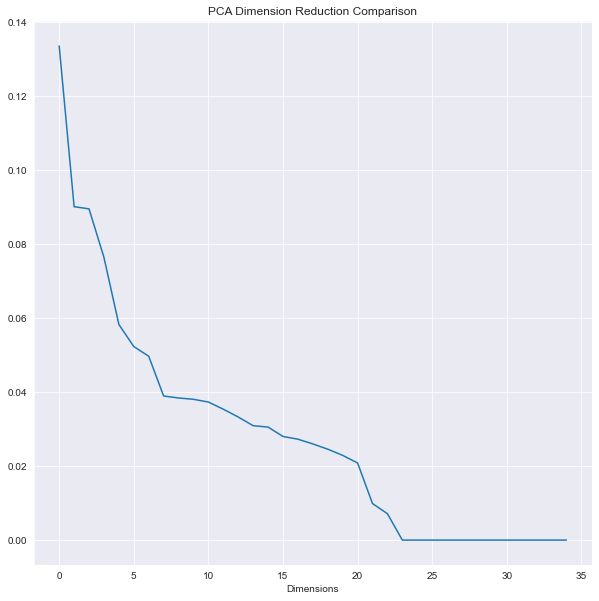

In [49]:
#Show the PCA comparison

plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA Dimension Reduction Comparison')
plt.xlabel('Dimensions')

We don't use PCA quite yet, first we would run without it

## Classifier Comparison

### Hyperparameter Tuning

We are going to run the following classifiers:

In [50]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', PipelineHelper([
    ('KNN', KNeighborsClassifier(algorithm='brute')),
    ('RFC', RandomForestClassifier()),
    ('MLP', MLPClassifier()),
    ('XGB', XGBClassifier()),
    ])),
])

params = {
    'clf__selected_model': pipe.named_steps['clf'].generate({
        'KNN__n_neighbors': list(range(1,31)),
        'RFC__n_estimators' : [100],
        'RFC__min_samples_split' : [2,4,6,8],
        'RFC__min_samples_leaf': [1,2,4,6],
        'MLP__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'MLP__activation': ['tanh', 'relu'],
        'MLP__solver': ['sgd', 'adam'],
        'MLP__alpha': [0.0001, 0.05],
        'MLP__learning_rate': ['constant','adaptive'],
        'XGB__n_estimators': [100,250,500],
        'XGB__learning_rate' : [0.01, 0.1],
        'XGB__subsample' :[0.5, 1.0],
        'XGB__max_depth' : [3,5,7],
        'XGB__criterion' : ['giny','entropy'],
        'XGB__objective':['binary:logistic'],
    }),
}
grid = RandomizedSearchCV(pipe, params, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train['cancelation'])
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
res_grid = pd.DataFrame(grid.cv_results_)
res_grid['model'] = res_grid['param_clf__selected_model'].astype(str)
res_grid['model'] = res_grid['model'].str.slice(start=2, stop=5)
res_grid = res_grid[['rank_test_score','model', 'mean_fit_time', 'mean_test_score', 'params']]
res_grid = res_grid.sort_values(['model', 'rank_test_score'], ascending = [True, False])
res_grid = res_grid.groupby('model').first().reset_index()
res_grid

In [ ]:
best_parameters = {i: k for i in res_grid['model'] for k in res_grid['params']}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
res_grid['params']

In [ ]:
classifiers = {
    # 'KNN' : KNeighborsClassifier(),
    # 'DST' : DecisionTreeClassifier(),
    'RFC' : RandomForestClassifier(min_samples_leaf=4,
                                   min_samples_split = 4,
                                   n_estimators = 100),
    'MLP' : MLPClassifier(activation = 'relu',
                          alpha = 0.0001,
                          hidden_layer_sizes = (50, 50, 50),
                          learning_rate = 'adaptive',
                          solver = 'adam'),
    'XGB' : XGBClassifier(paramerters=best_parameters['XGB']),
    # 'EXT' : ExtraTreesClassifier()
}

In [ ]:
# Plot confusion matrices and roc curves for every classifier

score_res = {}
pred_res = {}
auc_res = {}

for name, clf in tqdm(zip(classifiers.keys(), classifiers.values())):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    ax1, ax2, ax3 ,ax4= axes.flatten()
    clf.fit(X_train, y_train['cancelation'])
    score_res[clf] = clf.score(X_test, y_test['cancelation'])
    name = type(clf).__name__
    pred_res[name] = clf.predict(X_test)
    plot_confusion_matrix(clf,
                          X_test,
                          y_test['cancelation'],
                          ax=ax2)
    ax1.title.set_text(name)
    plot_roc_curve(clf,X_train,
                   y_train['cancelation'],
                   ax=ax3)
    plot_roc_curve(clf,
                   X_test,
                   y_test['cancelation'],
                   ax=ax4)
    fig.delaxes(ax1)
    auc_res[name] = roc_auc_score(y_test['cancelation'], pred_res[name])
    print("Test AUC score for {} :\t {}\n Score res: {}".format(name,
                                                                auc_res[name],
                                                                score_res[clf]))
    plt.tight_layout()
    plt.show()

In [ ]:
# Get highest score and classifier
score = max(auc_res.values())
score

we chose the model with the highest AUC score of test data which is the Random Forest classifier

## Features scoring

In [ ]:
# define number of features to evaluate
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores

for k in tqdm(num_features):
    # create pipeline
    model = grid.best_estimator_
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('rf', model)])
    # evaluate the model
    scores = evaluate_model(pipeline, X_train, y_train['cancelation'])
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

we can see that the optimal number of features is 35, meaning we need to use all our features.

## Validation Set - Running the Trained Model

In [ ]:
# TODO model on validation set and scores
## create function for validation set

# Apply and Predict to Test Data

As a final step, we would load and proccess the test data as needed to predict cancellation

In [ ]:
test = pd.read_csv('Data/feature_data_test.csv')
test = process_data(test)


# Random grid search
# Switch feature test with parameter tuning
#